<a href="https://colab.research.google.com/github/avi-007/Deep-Learning-Work/blob/master/Reuters_Newswire_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from keras.datasets import reuters
(train_data,train_labels),(test_data,test_labels)=reuters.load_data(num_words=10000)

Using TensorFlow backend.


2113536/2110848 [==============================] - 1s 0us/step


In [0]:
len(train_data)

8982

In [0]:
len(test_data)

2246

In [0]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])
print(decoded_newswire)
test_data[0]

? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


[1,
 4,
 1378,
 2025,
 9,
 697,
 4622,
 111,
 8,
 25,
 109,
 29,
 3650,
 11,
 150,
 244,
 364,
 33,
 30,
 30,
 1398,
 333,
 6,
 2,
 159,
 9,
 1084,
 363,
 13,
 2,
 71,
 9,
 2,
 71,
 117,
 4,
 225,
 78,
 206,
 10,
 9,
 1214,
 8,
 4,
 270,
 5,
 2,
 7,
 748,
 48,
 9,
 2,
 7,
 207,
 1451,
 966,
 1864,
 793,
 97,
 133,
 336,
 7,
 4,
 493,
 98,
 273,
 104,
 284,
 25,
 39,
 338,
 22,
 905,
 220,
 3465,
 644,
 59,
 20,
 6,
 119,
 61,
 11,
 15,
 58,
 579,
 26,
 10,
 67,
 7,
 4,
 738,
 98,
 43,
 88,
 333,
 722,
 12,
 20,
 6,
 19,
 746,
 35,
 15,
 10,
 9,
 1214,
 855,
 129,
 783,
 21,
 4,
 2280,
 244,
 364,
 51,
 16,
 299,
 452,
 16,
 515,
 4,
 99,
 29,
 5,
 4,
 364,
 281,
 48,
 10,
 9,
 1214,
 23,
 644,
 47,
 20,
 324,
 27,
 56,
 2,
 2,
 5,
 192,
 510,
 17,
 12]

In [0]:
from keras.utils.np_utils import to_categorical
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [0]:
from keras import models
from keras import layers

model=models.Sequential()
model.add(layers.Dense(64,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(46,activation='softmax'))

In [0]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [0]:
history = model.fit(partial_x_train,
partial_y_train,
epochs=20,
batch_size=512,
validation_data=(x_val, y_val))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 7982 samples, validate on 1000 samples
Epoch 1/20





7982/7982 [==============================] - 2s 239us/step - loss: 2.5028 - acc: 0.5457 - val_loss: 1.6580 - val_acc: 0.6270
Epoch 2/20
7982/7982 [==============================] - 1s 121us/step - loss: 1.3610 - acc: 0.7144 - val_loss: 1.2839 - val_acc: 0.7180
Epoch 3/20
7982/7982 [==============================] - 1s 121us/step - loss: 1.0168 - acc: 0.7785 - val_loss: 1.1295 - val_acc: 0.7710
Epoch 4/20
7982/7982 [==============================] - 1s 123us/step - loss: 0.7996 - acc: 0.8310 - val_loss: 1.0147 - val_acc: 0.7830
Epoch 5/20
7982/7982 [==============================] - 1s 124us/step - loss: 0.6319 - acc: 0.8688 - val_loss: 0.9681 - val_acc: 0.8050
Epoch 6/20
7982/7982 [==============================] - 1s 127us/step - loss: 0.4988 - acc: 0.8989 - val_loss: 0.9548 - val_acc: 0.7870
Epoch 7/20
7982/7982 [============

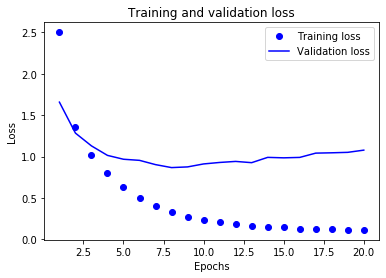

In [0]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

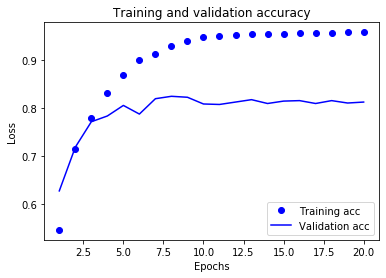

In [0]:
plt.clf()
acc = history.history['acc']
val_acc = history.history['val_acc']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [0]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])
model.fit(partial_x_train,
partial_y_train,
epochs=9,
batch_size=512,
validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 1s 150us/step - loss: 2.6307 - acc: 0.5030 - val_loss: 1.7280 - val_acc: 0.6460
Epoch 2/9
7982/7982 [==============================] - 1s 124us/step - loss: 1.3889 - acc: 0.7174 - val_loss: 1.2782 - val_acc: 0.7250
Epoch 3/9
7982/7982 [==============================] - 1s 123us/step - loss: 1.0188 - acc: 0.7830 - val_loss: 1.1139 - val_acc: 0.7520
Epoch 4/9
7982/7982 [==============================] - 1s 122us/step - loss: 0.8032 - acc: 0.8241 - val_loss: 1.0062 - val_acc: 0.7960
Epoch 5/9
7982/7982 [==============================] - 1s 123us/step - loss: 0.6343 - acc: 0.8628 - val_loss: 0.9702 - val_acc: 0.7940
Epoch 6/9
7982/7982 [==============================] - 1s 124us/step - loss: 0.5116 - acc: 0.8900 - val_loss: 0.9329 - val_acc: 0.8060
Epoch 7/9
7982/7982 [==============================] - 1s 123us/step - loss: 0.4079 - acc: 0.9163 - val_loss: 0.9166 - val_acc: 0.8030
Epoch 8

In [0]:
results

[0.9886955437868277, 0.7853962600178095]

In [0]:
predictions = model.predict(x_test)
predictions[0].shape

(46,)

In [0]:
model.predict(x_test)

array([[2.8541961e-04, 8.9381050e-05, 5.5851169e-06, ..., 1.6978025e-05,
        1.4889626e-07, 4.9350077e-05],
       [7.7624884e-03, 4.9215761e-01, 1.3086600e-03, ..., 2.7510778e-06,
        8.1896357e-04, 1.3923083e-03],
       [1.0818259e-03, 8.1565440e-01, 2.5967413e-04, ..., 8.0124475e-05,
        3.1533229e-04, 5.4545677e-04],
       ...,
       [2.3176422e-04, 9.6773692e-05, 2.5787360e-05, ..., 6.5999906e-05,
        1.2639640e-06, 1.3120405e-04],
       [5.9896149e-03, 6.9522634e-02, 1.5816166e-03, ..., 2.6666401e-03,
        3.9281230e-04, 3.3222402e-03],
       [2.7518460e-04, 9.0817517e-01, 8.3335373e-04, ..., 5.6494184e-05,
        2.3300289e-04, 3.7671215e-04]], dtype=float32)